IF you see ModuleNotFoundError: No module named 'cv2.ximgproc' run again `pip install -r requirements.txt` to install opencv-contrib-python package

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import SimpleITK as sitk

from pathlib import Path
from tqdm import tqdm
import cv2
import os

from dehazing import dehaze


In [2]:
def simple_im_show(img, figsize=(10, 10)):
    plt.figure(figsize=figsize)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

def simple_im_show2(img, mask, figsize=(10, 10)):
    fig, ax = plt.subplots(1,2, figsize=figsize)
    ax[0].imshow(img, cmap='gray')
    ax[1].imshow(mask, cmap='gray')
    ax[0].axis('off')
    ax[1].axis('off')
    plt.show()

In [3]:
base_path = Path(os.path.abspath(os.path.join("data", "INbreast Release 1.0")))
csvs_path = base_path
png_folder = base_path/'AllPNGs'
masks_folder = base_path/'AllMasks'
dcm_folder = base_path/'AllDICOMs'
xml_folder = base_path/'AllXML'

image_filanme = "20586908_6c613a14b80a8591_MG_R_CC_ANON.dcm"
image_metadata = {'img_id': image_filanme.split('_')[0],
                  'case_id': image_filanme.split('_')[1],
                  'side': image_filanme.split('_')[3],
                  'view': image_filanme.split('_')[4]}
dcm_filename = dcm_folder/image_filanme

roi_df = pd.read_csv(csvs_path/"rois_metadata.csv",
                     index_col=0)

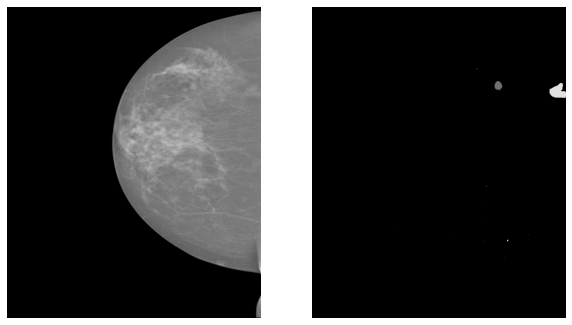

In [4]:
mask = cv2.imread(str(
    masks_folder/f'{image_metadata["img_id"]}_lesion_mask.png'), cv2.IMREAD_GRAYSCALE)
png = cv2.imread(
    str(png_folder/f'{image_metadata["img_id"]}.png'), cv2.IMREAD_ANYDEPTH)

simple_im_show2(png, mask)


In [32]:
png = png.astype(np.float32)
normalized_png = png/png.max()

# these parameters so far seem to show the best more or less result
dehzed_png = dehaze(normalized_png, omega=0.9, window_size=11, radius=40, eps=1e-5)

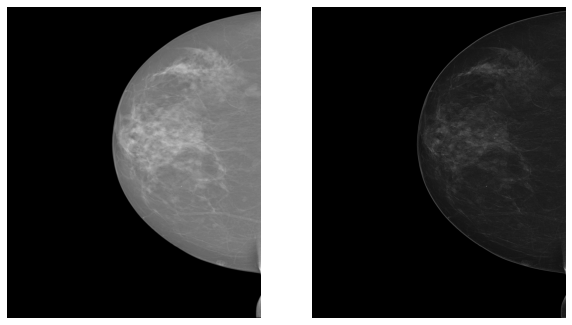

In [33]:
simple_im_show2(png, dehzed_png)

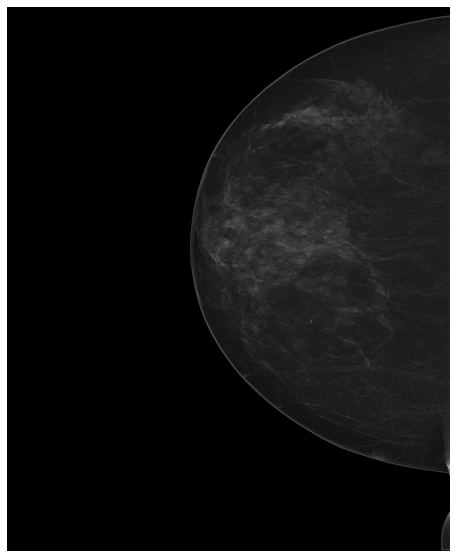

In [34]:
simple_im_show(dehzed_png)